In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplhep as hep

In [2]:
hep.style.use("CMS")

In [3]:
prefix = '/uscms/home/kyungmip/nobackup/CMSSW_10_6_26_8April2024_BACKUP/src/iDMe/python_analysis/studies/OneBinSR/'

In [4]:
df_inclusive = pd.read_csv(f'{prefix}inclusive-BDT-new-variables/csv/SR_Yields/SR_BDTv3_S_over_B.csv')

In [5]:
df_new = pd.read_csv(f'./csv/SR_Yields//SR_S_over_B.csv')

In [6]:
ctau = 1
delta = 0.1

m1s = [5, 10, 20, 30, 40, 50, 70, 90, 100]

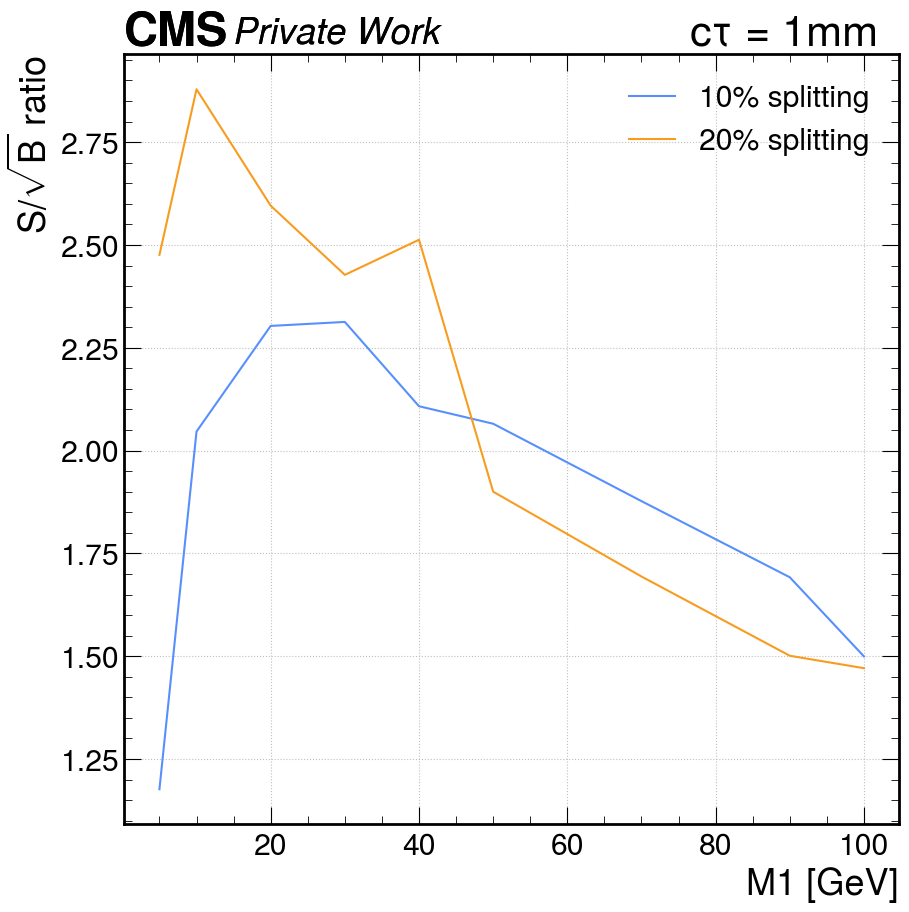

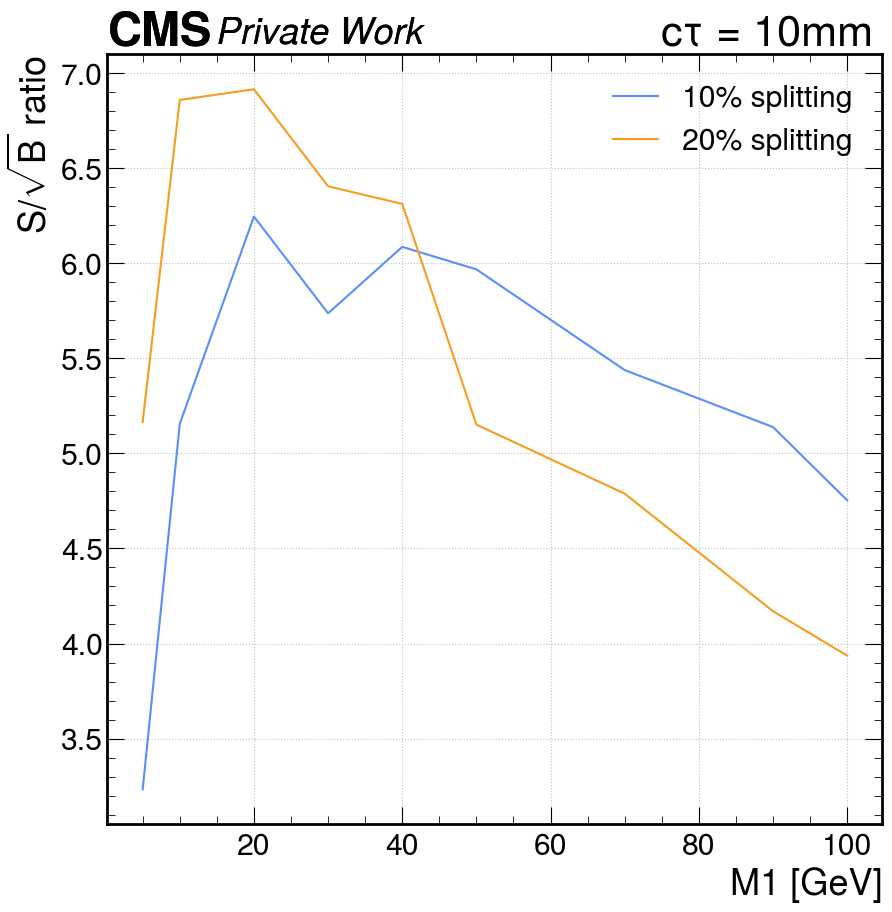

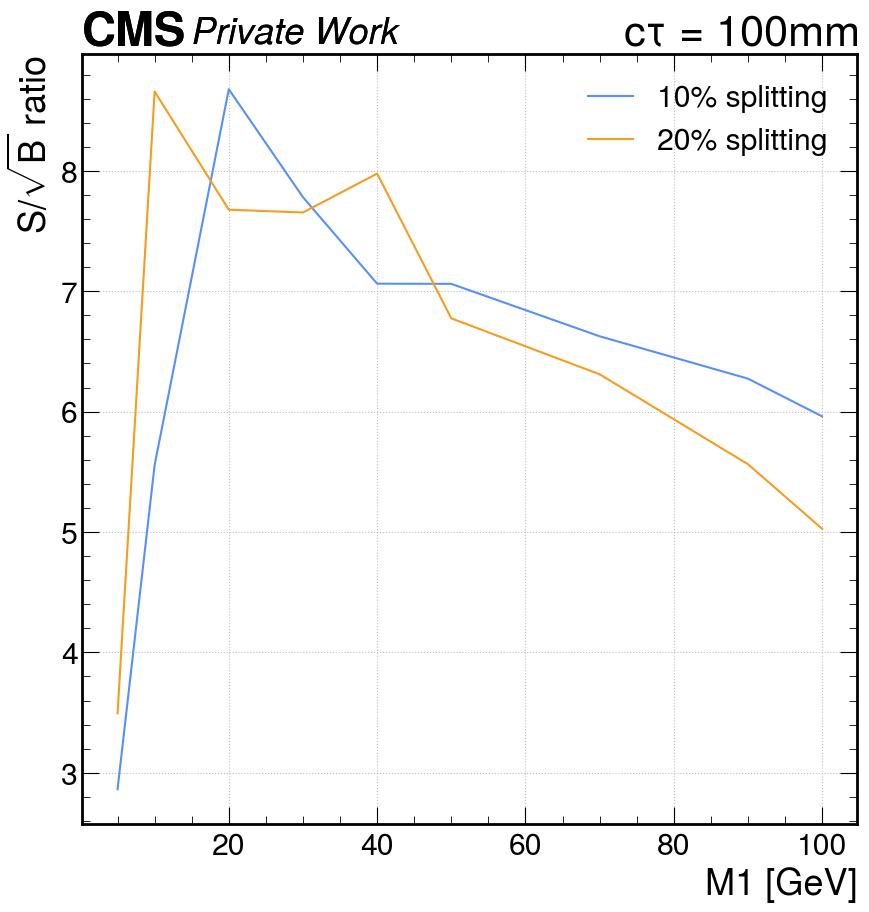

In [7]:
for ctau in [1,10,100]:
    for delta in [0.1,0.2]:
        hep.cms.label('', data=False, llabel='Private Work', rlabel='')
        an_v1 = []
        an_v2 = []
        
        for m1 in m1s:
            an_v1.append(df_inclusive[ (df_inclusive.m1 == m1) & (df_inclusive.delta == delta) & (df_inclusive.ctau == ctau) ].iloc[:,-1].to_list()[0])
            an_v2.append(df_new[ (df_new.m1 == m1) & (df_new.delta == delta) & (df_new.ctau == ctau) ].iloc[:,-1].to_list()[0])
        
        plt.plot(m1s, np.array(an_v2)/np.array(an_v1), label=f'{int(delta*100)}% splitting')
        
        plt.legend()
        
        plt.xlabel('M1 [GeV]')
        plt.ylabel(r"$S/\sqrt{B}$ ratio")
        
        #plt.ylim([0,7])
        
        plt.title(rf"$c\tau$ = {ctau}mm", position=(0.85, 0.5))
    
    plt.grid()
    plt.show()

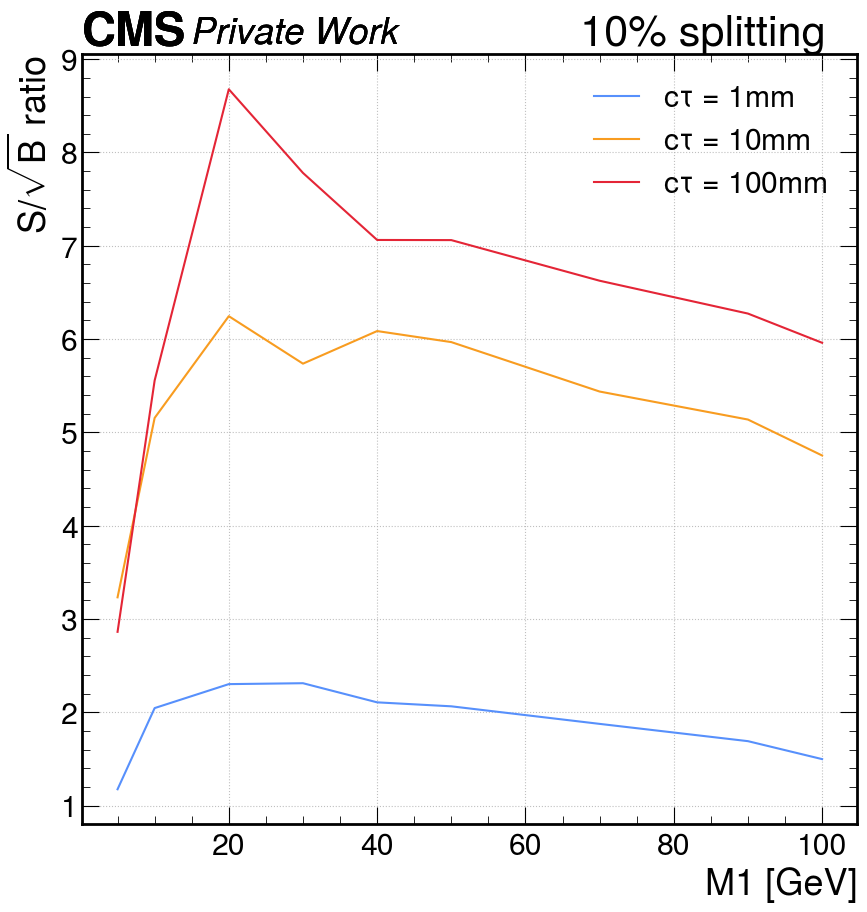

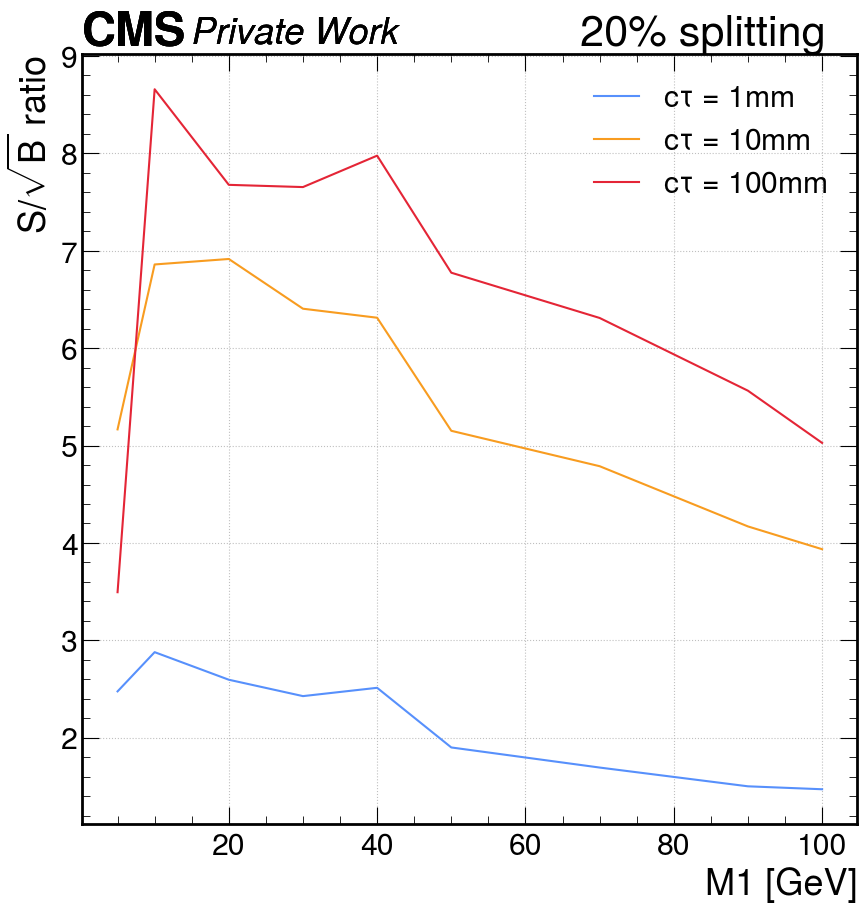

In [8]:

for delta in [0.1,0.2]:
    for ctau in [1,10,100]:
        hep.cms.label('', data=False, llabel='Private Work', rlabel='')
        an_v1 = []
        an_v2 = []
        
        for m1 in m1s:
            an_v1.append(df_inclusive[ (df_inclusive.m1 == m1) & (df_inclusive.delta == delta) & (df_inclusive.ctau == ctau) ].iloc[:,-1].to_list()[0])
            an_v2.append(df_new[ (df_new.m1 == m1) & (df_new.delta == delta) & (df_new.ctau == ctau) ].iloc[:,-1].to_list()[0])
        
        plt.plot(m1s, np.array(an_v2)/np.array(an_v1), label=rf"$c\tau$ = {ctau}mm")
        
        plt.legend()
        
        plt.xlabel('M1 [GeV]')
        plt.ylabel(r"$S/\sqrt{B}$ ratio")
        
        #plt.ylim([0,7])
        
        plt.title(rf"{int(delta*100)}% splitting", position=(0.8, 0.5))
    
    plt.grid()
    plt.show()

In [35]:
ctau = 100
delta = 0.2

m1s = [5, 10, 20, 30, 40, 50, 70, 90, 100]


In [36]:
ratio_ctau_100 = []

for m1 in m1s:
    df = df_ctau_100
    s_over_b_df = df[ (df.m1 == m1) & (df.delta == delta) & (df.ctau == ctau) ].iloc[:,-1].to_list()[0]
    s_over_b_cut = df_cut[ (df_cut.m1 == m1) & (df_cut.delta == delta) & (df_cut.ctau == ctau) ].iloc[:,-1].to_list()[0]

    ratio_ctau_100.append(s_over_b_df/s_over_b_cut)

In [37]:
ratio_ctau_OR = []

for m1 in m1s:
    df = df_ctau_OR
    s_over_b_df = df[ (df.m1 == m1) & (df.delta == delta) & (df.ctau == ctau) ].iloc[:,-1].to_list()[0]
    s_over_b_cut = df_cut[ (df_cut.m1 == m1) & (df_cut.delta == delta) & (df_cut.ctau == ctau) ].iloc[:,-1].to_list()[0]

    ratio_ctau_OR.append(s_over_b_df/s_over_b_cut)

In [38]:
ratio_lxy = []

for m1 in m1s:
    df = df_lxy
    s_over_b_df = df[ (df.m1 == m1) & (df.delta == delta) & (df.ctau == ctau) ].iloc[:,-1].to_list()[0]
    s_over_b_cut = df_cut[ (df_cut.m1 == m1) & (df_cut.delta == delta) & (df_cut.ctau == ctau) ].iloc[:,-1].to_list()[0]

    ratio_lxy.append(s_over_b_df/s_over_b_cut)

In [39]:
ratio_inclusive = []

for m1 in m1s:
    df = df_inclusive
    s_over_b_df = df[ (df.m1 == m1) & (df.delta == delta) & (df.ctau == ctau) ].iloc[:,-1].to_list()[0]
    s_over_b_cut = df_cut[ (df_cut.m1 == m1) & (df_cut.delta == delta) & (df_cut.ctau == ctau) ].iloc[:,-1].to_list()[0]

    ratio_inclusive.append(s_over_b_df/s_over_b_cut)

Text(0.5, 1.0, 'ctau = 100mm, delta = 0.2')

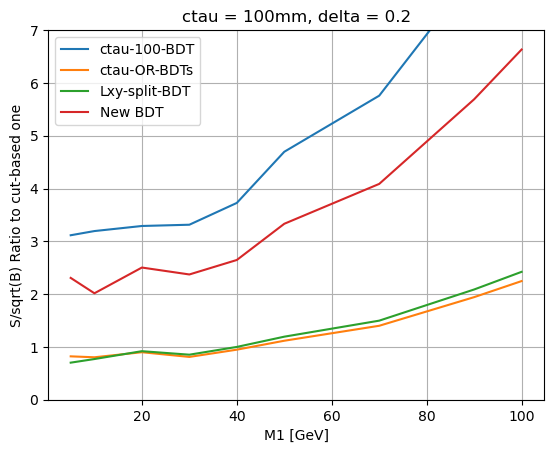

In [40]:
plt.plot(m1s, ratio_ctau_100, label='ctau-100-BDT')
plt.plot(m1s, ratio_ctau_OR, label='ctau-OR-BDTs')
plt.plot(m1s, ratio_lxy, label='Lxy-split-BDT')
plt.plot(m1s, ratio_inclusive, label='New BDT')

plt.legend()
plt.grid()

plt.xlabel('M1 [GeV]')
plt.ylabel('S/sqrt(B) Ratio to cut-based one')

plt.ylim([0,7])

plt.title(f'ctau = {ctau}mm, delta = {delta}')